## Importing Libraries

In [28]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import pandas for data manipulation and analysis
import pandas as pd

# Import seaborn for data visualization
import seaborn as sns

# Import numpy for numerical operations
import numpy as np

# Import KNeighborsClassifier for K-Nearest Neighbors classification
from sklearn.neighbors import KNeighborsClassifier

# Import train_test_split for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Import classification_report and accuracy_score for model evaluation metrics
from sklearn.metrics import classification_report, accuracy_score


## Importing Dataset

In [29]:
# Define column names for the dataset
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Load the dataset from a CSV file
df = pd.read_csv("IRIS.csv", names=columns)

## Data Exploration

In [30]:
# Display the first few rows of the dataframe to verify data loading
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
# Display the last few rows of the dataframe to get an overview of the end of the dataset
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [32]:
# Generate descriptive statistics for the dataframe
# This includes count, mean, standard deviation, min, 25th percentile, median (50th percentile), 75th percentile, and max
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
# Display the dimensions of the dataframe
# This returns the number of rows and columns in the dataset as a tuple (rows, columns)
df.shape

(150, 5)

In [34]:
# Display a concise summary of the dataframe
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [35]:
# Display the number of missing values in each column of the dataframe
# This helps to identify any columns with null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [36]:
# Display the counts of unique values in the 'species' column of the DataFrame
print(df['species'].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [37]:
# Check if there are any duplicate rows in the DataFrame
df.duplicated().any()

True

In [38]:
# Drop duplicate rows from the DataFrame
df = df.drop_duplicates()

# Display the dimensions of the updated DataFrame
df.shape

(147, 5)

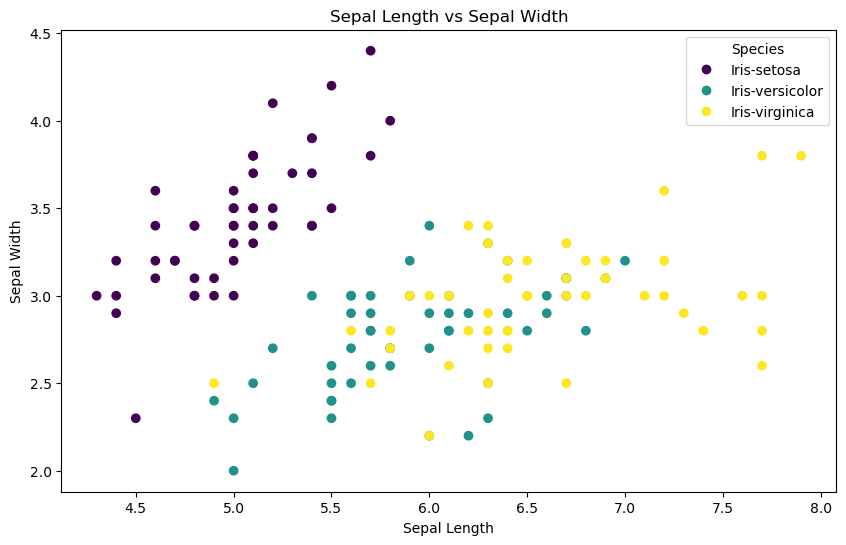

In [39]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Create a scatter plot of Sepal Length vs Sepal Width
# Color the points by species, using a colormap for better visualization
scatter = plt.scatter(df['sepal_length'], df['sepal_width'], 
                      c=df['species'].astype('category').cat.codes, cmap='viridis')

# Set the x-axis label
plt.xlabel('Sepal Length')

# Set the y-axis label
plt.ylabel('Sepal Width')

# Set the title of the plot
plt.title('Sepal Length vs Sepal Width')

# Create a legend using the scatter plot elements
handles, labels = scatter.legend_elements()

# Add the legend to the plot with species labels
plt.legend(handles, df['species'].unique(), title='Species')

# Display the plot
plt.show()


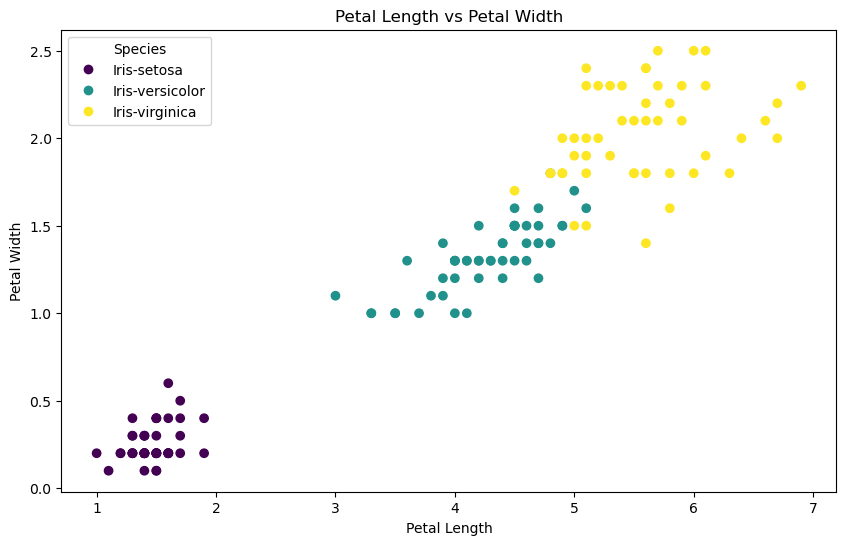

In [40]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Create a scatter plot of Petal Length vs Petal Width
# Color the points by species, using a colormap for better visualization
scatter = plt.scatter(df['petal_length'], df['petal_width'], 
                      c=df['species'].astype('category').cat.codes, cmap='viridis')

# Set the x-axis label
plt.xlabel('Petal Length')

# Set the y-axis label
plt.ylabel('Petal Width')

# Set the title of the plot
plt.title('Petal Length vs Petal Width')

# Create a legend using the scatter plot elements
handles, labels = scatter.legend_elements()

# Add the legend to the plot with species labels
plt.legend(handles, df['species'].unique(), title='Species')

# Display the plot
plt.show()


In [41]:
# Create a new dataframe 'util1' by dropping the 'species' column from the original dataframe
util1 = df.drop("species", axis=1)

# Create a new series 'util2' containing only the 'species' column from the original dataframe
util2 = df["species"]

# Display the 'util1' dataframe to verify the changes
print(util1)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[147 rows x 4 columns]


In [42]:
# Display the 'util2' dataframe to verify the changes
util2

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object

## Train-Test Splitting with 0.2 test_size


In [43]:
# Read the IRIS dataset from the CSV file into a DataFrame 'data'
data = pd.read_csv('IRIS.csv')

# Assign the feature columns to 'util1' and the target column to 'util2'
util1 = data.iloc[:, :-1]  # All rows, all columns except the last one (features)
util2 = data.iloc[:, -1]   # All rows, only the last column (target)

# Convert the feature columns in 'util1' to numeric data types (if they are not already numeric)
util1 = util1.apply(pd.to_numeric)

# Split the dataset into training and testing sets
# Use 80% of the data for training and 20% for testing, with a fixed random state for reproducibility
X_train0, X_test0, Y_train0, Y_test0 = train_test_split(util1, util2, test_size=0.2, random_state=42)

##  Prediction

In [44]:
# Initialize the K-Nearest Neighbors classifier with 3 neighbors
knn0 = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN classifier to the training data
knn0.fit(X_train0, Y_train0)

KNeighborsClassifier(n_neighbors=3)

In [45]:
# Use the trained KNN classifier to make predictions on the test data
Y_pred0 = knn0.predict(X_test0)

In [46]:
# Calculate and print the accuracy score obtained from the predictions
print("Accuracy obtained:", accuracy_score(Y_test0, Y_pred0))

Accuracy obtained: 0.9333333333333333


In [47]:
# Generate and print the classification report
print(classification_report(Y_test0, Y_pred0))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



## Train-Test Splitting with 0.3 test_size


In [48]:
# Read the IRIS dataset from the CSV file into a DataFrame 'data'
data = pd.read_csv('IRIS.csv')

# Assign the feature columns to 'util1' and the target column to 'util2'
util1 = data.iloc[:, :-1]  # All rows, all columns except the last one (features)
util2 = data.iloc[:, -1]   # All rows, only the last column (target)

# Convert the feature columns in 'util1' to numeric data types (if they are not already numeric)
util1 = util1.apply(pd.to_numeric)

# Split the dataset into training and testing sets
# Use 80% of the data for training and 20% for testing, with a fixed random state for reproducibility
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(util1, util2, test_size=0.2, random_state=42)

## Prediction

In [49]:
# Initialize the K-Nearest Neighbors classifier with 3 neighbors
knn1 = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN classifier to the training data
knn1.fit(X_train1, Y_train1)

KNeighborsClassifier(n_neighbors=3)

In [50]:
# Use the trained KNN classifier to make predictions on the test data
Y_pred1 = knn1.predict(X_test1)

In [51]:
# Calculate and print the accuracy score obtained from the predictions
print("Accuracy obtained:", accuracy_score(Y_test1, Y_pred1))

Accuracy obtained: 0.9333333333333333


In [52]:
# Generate and print the classification report
print(classification_report(Y_test1, Y_pred1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



In [53]:
# Define a new data point as a numpy array
test = np.array([[6.5,3,5.5,1.8]])

# Use the trained KNN classifier to predict the class of the new data point
prediction = knn1.predict(test)

c:\Users\Hemant Gupta\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [54]:
# Access the predicted class label from the 'prediction' array
predicted_class = prediction[0]
predicted_class

'Iris-virginica'